In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
from pathlib import Path
import os
from matplotlib.dates import DayLocator, DateFormatter
import matplotlib.dates as mdates

%matplotlib widget

def extract_date(filename):
    separator= "_", 
    date_position = 1
    date_string = filename.split(separator)[date_position]
    date_obj = datetime.strptime(date_string, "%Y_%m_%d")
    return date_obj.date()

fname = "res/detect_top_border/top_border_coords.txt"
icepy_dir = Path.cwd().parents[1]
filepath = icepy_dir / fname
data = pd.read_csv(filepath)
# data["date"] = data["pcd_name"].apply(extract_date)
data["date"] =  pd.to_datetime(data["date"], format="%Y_%m_%d")

h_lims  = [110, 114]
# data.loc[data["z_median"]  < h_lims[0],"z_median"] = np.nan
# data.loc[data["z_median"]  > h_lims[1],"z_median"] = np.nan
valid = (data["z_median"]  > h_lims[0]) & (data["z_median"] < h_lims[1])


data["z_median_rolling"] = data["z_median"][valid].rolling(5, min_periods=1, center=True).median()
data["z_mean_rolling"] = data["z_median"][valid].rolling(5, min_periods=1, center=True).mean()

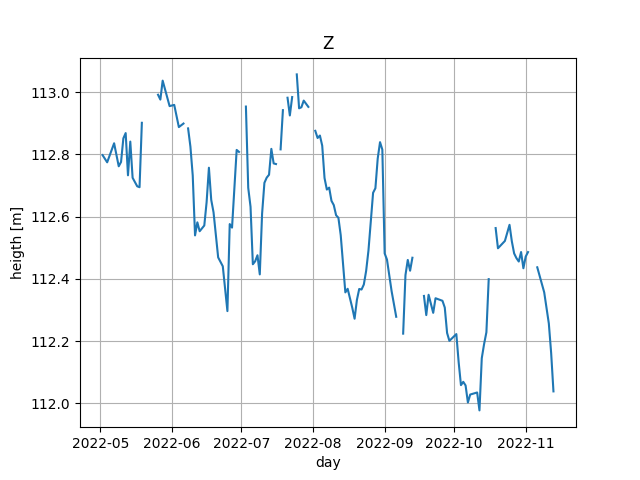

In [2]:
fig, ax = plt.subplots(1,1)
# ax.plot(data["date"], data["z_median_rolling"])
ax.plot(data["date"], data["z_mean_rolling"])
ax.grid(visible=True)
ax.set_xlabel("day")
ax.set_ylabel("heigth [m]")
ax.set_title("Z")
plt.show()

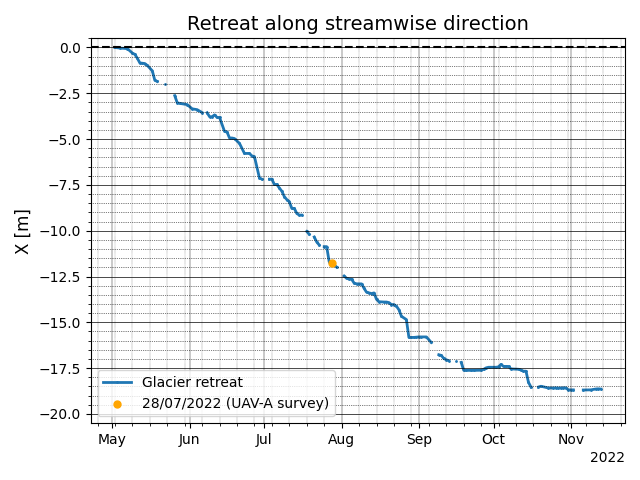

In [10]:
data["x_mean_rolling"] = data["x_median"][valid].rolling(5, min_periods=1, center=True).median()
data["y_mean_rolling"] = data["y_median"][valid].rolling(5, min_periods=1, center=True).median()
base_x = data["x_mean_rolling"][0]

major_locator = mdates.MonthLocator(interval=1)
major_formatter = mdates.ConciseDateFormatter(major_locator)
minor_locator =  mdates.WeekdayLocator(byweekday=0, interval=1)

uav_date = datetime(2022, 7, 28)
retreat_uav_date = data["x_mean_rolling"][data["date"] == uav_date] - base_x

fig, ax = plt.subplots(1,1)
p1 = ax.plot(data["date"], data["x_mean_rolling"]-base_x,'o-', linewidth=2, markersize=1, label="Glacier retreat", zorder=0)
p2 = ax.scatter(uav_date, retreat_uav_date, s=25, color='orange', label="28/07/2022 (UAV-A survey)", zorder=2)
ax.axhline(y=0, color='black', linestyle='--')
ax.grid(visible=True)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel("X [m]", fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.set_title("Retreat along streamwise direction", fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)
ax.minorticks_on()
ax.grid(which="major", axis="y", linewidth=0.5, color="black")
ax.grid(which="major", axis="x", linewidth=0.3, color="black")
ax.grid(which="minor", axis="y", linestyle=":", linewidth=0.5, color="black")
ax.grid(which="minor", axis="x", linestyle=":", linewidth=0.3, color="black")
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_ylim(-20.5, 0.5)
plt.tight_layout()
# plt.show()

